In [27]:
from src.cw_57.lab_util import create_plot_for_poly

In [28]:
import re
def parse_data():
    with open('../../data/57/pomiary.txt', newline='') as file:
        text = file.read()
        text = re.sub("[,]", ".", text)
        text = re.sub("[ ]",",",text)
    with open("../../data/57/pomiary-copy.txt", mode='w') as file:
        file.write(text)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [30]:
parse_data()
df = pd.read_csv('../../data/57/pomiary-copy.txt')
df = df.drop("l.p", 1)
df

,U[v],I[mA]
0,0.15,0.55
1,0.25,0.54
2,0.39,0.55
3,0.50,0.53
4,0.63,0.52
5,0.77,0.50
6,0.90,0.50
7,1.10,0.48
8,1.15,0.45
9,1.25,0.44


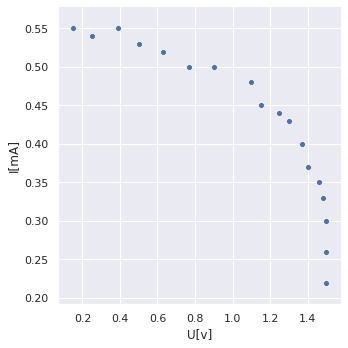

In [31]:
sns.set(style="darkgrid")
sns.relplot(x="U[v]", y="I[mA]", data=df)


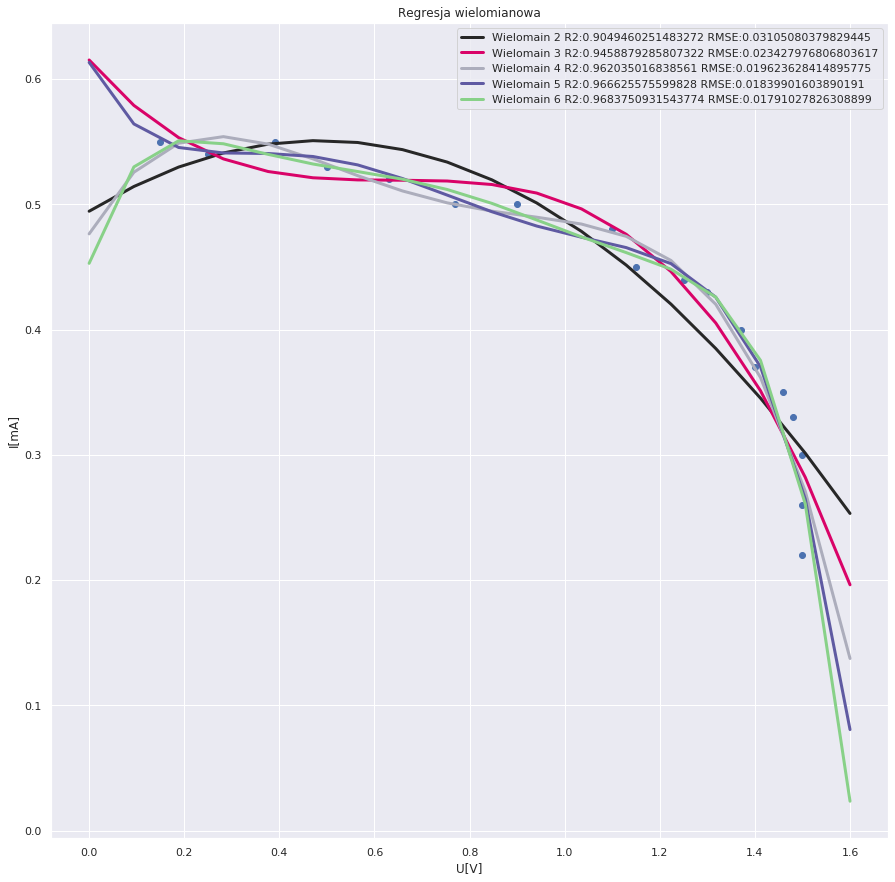

R2 = (0.9683750931543774, 6)
RMSE = (0.01791027826308899, 6)


In [32]:
y = df['I[mA]'].to_numpy()
x = df["U[v]"].to_numpy()
line = np.linspace(0, 1.6, y.size)


create_plot_for_poly(x, y, line)

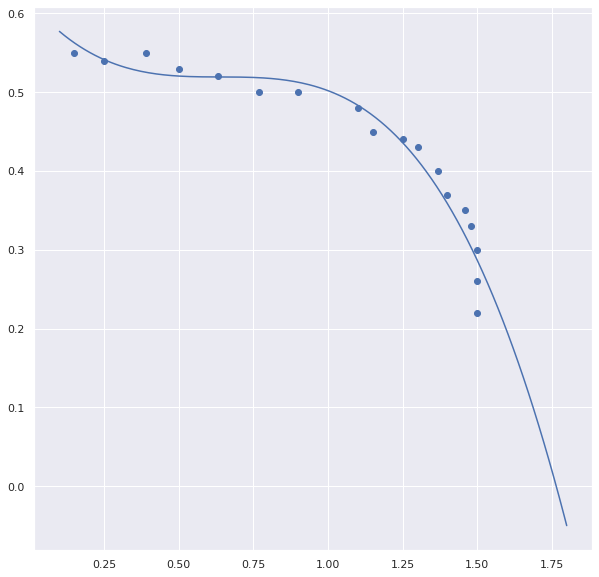

In [104]:
line = np.linspace(0.1, 1.8, 200)
#print(line)
model = np.poly1d(np.polyfit(x,y, 3))
model_deriv = model.deriv()
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.plot(line, model(line))
plt.show()

In [141]:
result = dict()
for i in np.arange(0, 1.6, 0.1):
    y_pred_der = model(i)
    result[(y_pred_der * i)] =i 
u_max = max(result.items())[1]

In [157]:
i_max = model(u_max)
i_sc = model(0)
u_sc = np.real(model.roots[0])
p_max = u_max * i_max
FF = p_max / (u_sc * i_sc)
p_light = 11.87 
eta = p_max/p_light
eta*100 

4.597358964790925